In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data='yeast'

In [147]:
filenames = [["./results/deepnf_yeast_2000_600.txt", "./results/output_yeast_2000_600_.txt"]]
methods = ['deepnf','Tied Attentive MDA']
colors = ['r','b', 'g']
markers = ['o','^', '*']
metric_names = ['Micro AUPR','Macro AUPR', 'F1-score', 'Accuracy']
titles = [str(600), str(64), str(128)]

In [138]:
labels = {}
labels['yeast'] = ['level1', 'level2', 'level3']
labels['human'] = ['bp_1', 'bp_2', 'bp_3',
                            'mf_1', 'mf_2', 'mf_3',
                            'cc_1', 'cc_2', 'cc_3']
C = len(labels[data])

In [139]:
def result_file_reader(filename):
    with open(filename) as f:
        lines = f.readlines()
        result = []
        for line in lines:
            splitted_line = line.rstrip().split(" ")
            if '.' in splitted_line[0]:
                ls = []
                for i in range(4):
                    ls.append(float(splitted_line[i]))
                result.append(np.array(ls))
    result = np.array(result)
    return result

In [140]:
def convert_result_list_to_array(filename):
    res = result_file_reader(filename)
    avg_result = []
    for split_res in np.split(res, C):
        avg_result.append(np.mean(split_res, axis=0))
    result = np.array(avg_result).T
    return result

In [104]:

# for filename in filenames: 
#     res = convert_result_list_to_array(filename)
#     print(res)

In [145]:
def plot_metrics(identifier, filenames):
    results = []
    for filename in filenames: 
        res = convert_result_list_to_array(filename)
        results.append(res)
    x = labels[data]
    fig = plt.figure()
    fig.suptitle("Comparison of deepNF and Our method with %s latent dimension." % titles[identifier])
    fig.set_size_inches(12, 8)
    fig.subplots_adjust(hspace=0.2,wspace=0.2)
    for ind in range(1, len(metric_names)+1):
        ax = fig.add_subplot(2, 2, ind)
        ax.set_ylabel(metric_names[ind-1], fontsize=14)
        ax.set_xlabel("Functional categories", fontsize=14)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        for k in range(len(results)):    
            ax.plot(x, results[k][ind-1], color=colors[k], markersize= 10, marker= markers[k],linewidth=2, label=methods[k])
        ax.legend(fontsize=12)
        ind += 1
    
    plt.savefig('plots/model_comparison_2000_600.pdf', dpi =1200)
    plt.show()
    print("\n")

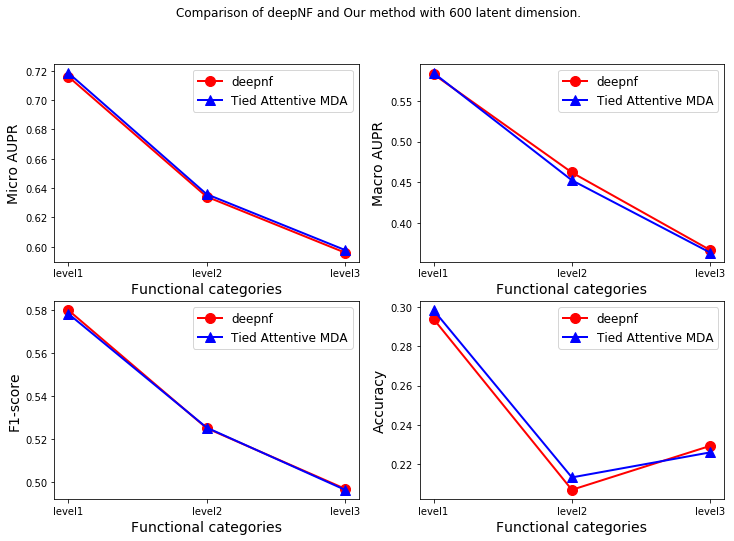

In [148]:
metrics = ['m_aupr','M_aupr', 'f1', 'acc']
for i, file_names in enumerate(filenames):
    plot_metrics(i, file_names)